# Defunciones en Sonora

En esta libreta se analiza la información de Secretaría de Salud acerca de las defunciones en el Estado de Sonora, México.
El interés de este proyecto es visualizar las principales causas de muerte, así como su evolución en los últimos 22 años.

se importan las librerías a utilizar

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import zipfile
from zipfile import ZipFile

se lee el archivo previamente procesado, 
se juntan las fechas en una sola columna

In [2]:
df = pd.read_csv("archivos/datos_sonora.zip", index_col= False)
df.head()

,ENT_REGIS,MUN_REGIS,ENT_RESID,MUN_RESID,TLOC_RESID,ENT_OCURR,MUN_OCURR,TLOC_OCURR,CAUSA_DEF,LISTA_MEX,...,LENGUA,COND_ACT,PAR_AGRE,ENT_OCULES,MUN_OCULES,LOC_RESID,LOC_OCURR,LOC_OCULES,RAZON_M,LOC_OCUR
0,2,2,26,55,13,2,2,15.0,K859,35P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,26,55,13,2,2,15.0,I619,30B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,26,55,13,2,2,15.0,P229,46F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,26,55,13,2,2,15.0,P220,46F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,26,55,13,2,2,15.0,J440,33G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('renglones y columnas: ', df.shape)

renglones y columnas:  (331302, 62)


In [4]:
df.columns

Index(['ENT_REGIS', 'MUN_REGIS', 'ENT_RESID', 'MUN_RESID', 'TLOC_RESID',
       'ENT_OCURR', 'MUN_OCURR', 'TLOC_OCURR', 'CAUSA_DEF', 'LISTA_MEX',
       'SEXO', 'EDAD', 'DIA_OCURR', 'MES_OCURR', 'ANIO_OCUR', 'DIA_REGIS',
       'MES_REGIS', 'ANIO_REGIS', 'DIA_NACIM', 'MES_NACIM', 'ANIO_NACIM',
       'OCUPACION', 'ESCOLARIDA', 'EDO_CIVIL', 'PRESUNTO', 'OCURR_TRAB',
       'LUGAR_OCUR', 'NECROPSIA', 'ASIST_MEDI', 'SITIO_OCUR', 'COND_CERT',
       'NACIONALID', 'DERECHOHAB', 'EMBARAZO', 'REL_EMBA', 'HORAS', 'MINUTOS',
       'CAPITULO', 'GRUPO', 'LISTA1', 'GR_LISMEX', 'VIO_FAMI', 'AREA_UR',
       'EDAD_AGRU', 'COMPLICARO', 'DIA_CERT', 'MES_CERT', 'ANIO_CERT', 'PESO',
       'MATERNAS', 'DIS_RE_OAX', 'CERT_NOMED', 'LENGUA', 'COND_ACT',
       'PAR_AGRE', 'ENT_OCULES', 'MUN_OCULES', 'LOC_RESID', 'LOC_OCURR',
       'LOC_OCULES', 'RAZON_M', 'LOC_OCUR'],
      dtype='object')

se seleccionan las columnas de interés

In [5]:
df = df[['ANIO_OCUR', 'MES_OCURR', 'DIA_OCURR', 'MUN_RESID', 'SEXO', 'EDAD_AGRU', 'GR_LISMEX']]

se cambia el nombre de las cabeceras

In [6]:
headers = ['año', 'mes', 'dia', 'municipio', 'genero', 'edad', 'causa']
df.columns = headers
df.head()

,año,mes,dia,municipio,genero,edad,causa
0,2007,2,22,55,2,19,35
1,2007,2,14,55,1,18,30
2,2007,2,10,55,1,1,46
3,2007,2,4,55,2,1,46
4,2007,2,24,55,1,17,33


## limpieza de datos

In [67]:
#df.fecha = pd.to_datetime(df.fecha)
df.dtypes

año           int64
mes           int64
dia           int64
municipio    object
genero        int64
edad          int64
causa        object
fecha        object
dtype: object

se genera la columna fecha

In [68]:
df['fecha'] = df['año'].astype(str) + df['mes'].astype(str).str.zfill(2) + df['dia'].astype(str).str.zfill(2)
#df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')
df = df.sort_values('fecha')
df.head()

,año,mes,dia,municipio,genero,edad,causa,fecha
59447,1998,1,1,Cajeme,2,21,Enfermedades endocrinas y metabólicas,19980101
60423,1998,1,1,Navojoa,1,9,Accidentes de transporte,19980101
60182,1998,1,1,Navojoa,2,17,Enfermedades endocrinas y metabólicas,19980101
60055,1998,1,1,Hermosillo,1,18,Tumores malignos de los órganos digestivos,19980101
60448,1998,1,1,Navojoa,2,14,Tumor maligno de órganos respiratorios e intra...,19980101


falta corregir los valores de fecha, por lo pronto de dejan así

se buscan valores nulos

In [9]:
df.isnull().sum()

año          0
mes          0
dia          0
municipio    0
genero       0
edad         0
causa        0
fecha        0
dtype: int64

se buscan valores fuera de rango

In [10]:
print(df.año.min())
print(df.año.max())
df.año.unique()

1908
9999


array([2007, 2006, 2001, 1981, 2004, 1997, 1957, 2003, 2005, 1998, 1984,
       1929, 1931, 9999, 2002, 2000, 1988, 1995, 1990, 1982, 1996, 1975,
       1935, 1994, 1993, 1917, 1970, 1959, 1983, 1927, 1953, 2008, 1992,
       1989, 1999, 1940, 1985, 1920, 1938, 1928, 1986, 1942, 1962, 1954,
       1961, 1974, 1991, 1919, 1937, 1980, 1930, 1956, 1968, 1958, 1944,
       1945, 1979, 1939, 1946, 1978, 1977, 1912, 1933, 1948, 1987, 1955,
       1976, 1908, 1951, 1952, 1949, 2012, 2011, 1960, 2010, 2009, 2018,
       2017, 2015, 2013, 2016, 2014, 2019, 1910, 1915, 1967, 1941, 1969,
       1924, 1950, 1965, 1914, 1966, 1947, 1925, 1911, 2020])

se descubren valores del año que fuera de rango por lo que se reemplazan por 9999

In [11]:
df['año'].replace([df['año'].loc[(df.año < 1998)]], 9999, inplace= True)

In [12]:
df['año'].unique()

array([2007, 2006, 2001, 9999, 2004, 2003, 2005, 1998, 2002, 2000, 2008,
       1999, 2012, 2011, 2010, 2009, 2018, 2017, 2015, 2013, 2016, 2014,
       2019, 2020])

In [13]:
print(df.mes.min())
print(df.mes.max())
df.mes.unique()

1
99


array([ 2,  3,  4,  1, 12,  5,  7,  6,  8,  9, 10, 11, 99])

In [57]:
df.drop(df['mes'].loc[(df.mes > 12)].index, inplace= True)

In [14]:
print(df.dia.min())
print(df.dia.max())
df.dia.unique()

1
99


array([22, 14, 10,  4, 24, 13, 19, 18, 30,  7, 16,  6,  1, 21, 28, 17, 15,
       27, 29,  9,  8, 31,  5, 20, 11,  3, 25, 26,  2, 12, 23, 99])

In [58]:
df.drop(df['dia'].loc[(df.dia > 31)].index, inplace= True)

se observan en el año valores fuera de rango, en mes y dia sólo los valores 99 que para la SSA significa NA

In [15]:
df.genero.unique()

array([2, 1, 9])

la edad es por grupos

In [16]:
df.edad.unique()

array([19, 18,  1, 17, 10, 15, 20, 13, 16, 14,  9, 12, 21, 22, 11,  8,  3,
        5,  7,  6, 23,  2,  4, 24, 25, 30, 26, 27, 28, 29])

se analiza las causas de muerte

In [17]:
df['causa'].unique()

array([' 35', ' 30', ' 46', ' 33', 'E55', ' 28', ' 36', ' 20', ' 12',
       ' 11', 'E51', ' 01', ' 38', ' 27', ' 29', ' 06', ' 05', ' 14',
       ' 23', ' 09', ' 10', 'E49', ' 18', ' 47', ' 02', 'E57', ' 15',
       'E52', ' 13', ' 03', ' 34', 'E54', ' 37', 'E50', ' 21', ' 17',
       ' 39', ' 48', ' 19', 'E58', ' 31', ' 32', ' 08', ' 22', ' 26',
       'E53', ' 43', 'E56', ' 45', ' 25', ' 41', ' 16', ' 07', ' 04',
       'E59', ' 24', '28', '30', '12', '07', '06', '47', '38', '33', '13',
       '23', '14', '09', '21', '20', '35', '18', '10', '29', '37', '01',
       '46', '11', '02', '27', '03', '45', '19', '31', '36', '48', '17',
       '26', '22', '43', '05', '08', '25', '39', '41', '04', '34', '40',
       '32', '16', '24', ' 40', '6', '2', '7', '3', '9', '5', '8', '1',
       '4'], dtype=object)

se observan algunas valores repetidos porque tienen espacio o cero a la izquierda

In [18]:
df['causa'] = df['causa'].str.lstrip()
df['causa'] = df['causa'].str.lstrip('0')
df['causa'].unique()

array(['35', '30', '46', '33', 'E55', '28', '36', '20', '12', '11', 'E51',
       '1', '38', '27', '29', '6', '5', '14', '23', '9', '10', 'E49',
       '18', '47', '2', 'E57', '15', 'E52', '13', '3', '34', 'E54', '37',
       'E50', '21', '17', '39', '48', '19', 'E58', '31', '32', '8', '22',
       '26', 'E53', '43', 'E56', '45', '25', '41', '16', '7', '4', 'E59',
       '24', '40'], dtype=object)

se corrigieron los valores

## transformación de los datos

se transforman las columnas municipios y causas para poder leerlas

se lee el archivo con la lista de municipios

In [19]:
municipios = pd.read_csv('archivos/municipios.csv', index_col=False)
municipios = municipios.loc[municipios['ID_ENTIDAD'] == 26].drop(['ID_ENTIDAD'], axis=1)

se itera sobre la columna para mostrar el nombre del municipio

In [20]:
df['municipio'] = df['municipio'].map(municipios.set_index('ID_MUNICIPIO')['NOM_MUNICIPIO'])

In [21]:
df.head()

,año,mes,dia,municipio,genero,edad,causa,fecha
0,2007,2,22,San Luis Río Colorado,2,19,35,20070222
1,2007,2,14,San Luis Río Colorado,1,18,30,20070214
2,2007,2,10,San Luis Río Colorado,1,1,46,20070210
3,2007,2,4,San Luis Río Colorado,2,1,46,20070204
4,2007,2,24,San Luis Río Colorado,1,17,33,20070224


se lee el archivo con la lista de causas de muerte y se itera sobre la columna causa

In [22]:
causas = pd.read_csv('archivos/grupo_lista_mexicana.csv', encoding='iso-8859-3')
df['causa'] = df['causa'].map(causas.set_index('CVE')['DESCRIP'])

In [23]:
df.head()

,año,mes,dia,municipio,genero,edad,causa,fecha
0,2007,2,22,San Luis Río Colorado,2,19,Enfermedades de otras partes del aparato diges...,20070222
1,2007,2,14,San Luis Río Colorado,1,18,Enfermedades cerebrovasculares,20070214
2,2007,2,10,San Luis Río Colorado,1,1,Ciertas afecciones originadas en el periodo pe...,20070210
3,2007,2,4,San Luis Río Colorado,2,1,Ciertas afecciones originadas en el periodo pe...,20070204
4,2007,2,24,San Luis Río Colorado,1,17,Otras enfermedades del aparato respiratorio,20070224


se puede leer la columna causa

se cuentan las diferentes causas de muerte

In [24]:
df['causa'].value_counts().count()

57

In [25]:
df['causa'].value_counts()

Enfermedades isquémicas del corazón                                                                                            54740
Enfermedades endocrinas y metabólicas                                                                                          39069
Otras enfermedades del aparato respiratorio                                                                                    28929
Enfermedades de otras partes del aparato digestivo                                                                             21531
Enfermedades cerebrovasculares                                                                                                 15641
Tumores malignos de los órganos digestivos                                                                                     13472
Agresiones                                                                                                                     11776
Accidentes de transporte                                             

se revisa si existen valores faltantes después de la transformación

In [26]:
df.isnull().sum()

año          0
mes          0
dia          0
municipio    0
genero       0
edad         0
causa        0
fecha        0
dtype: int64

<AxesSubplot:>

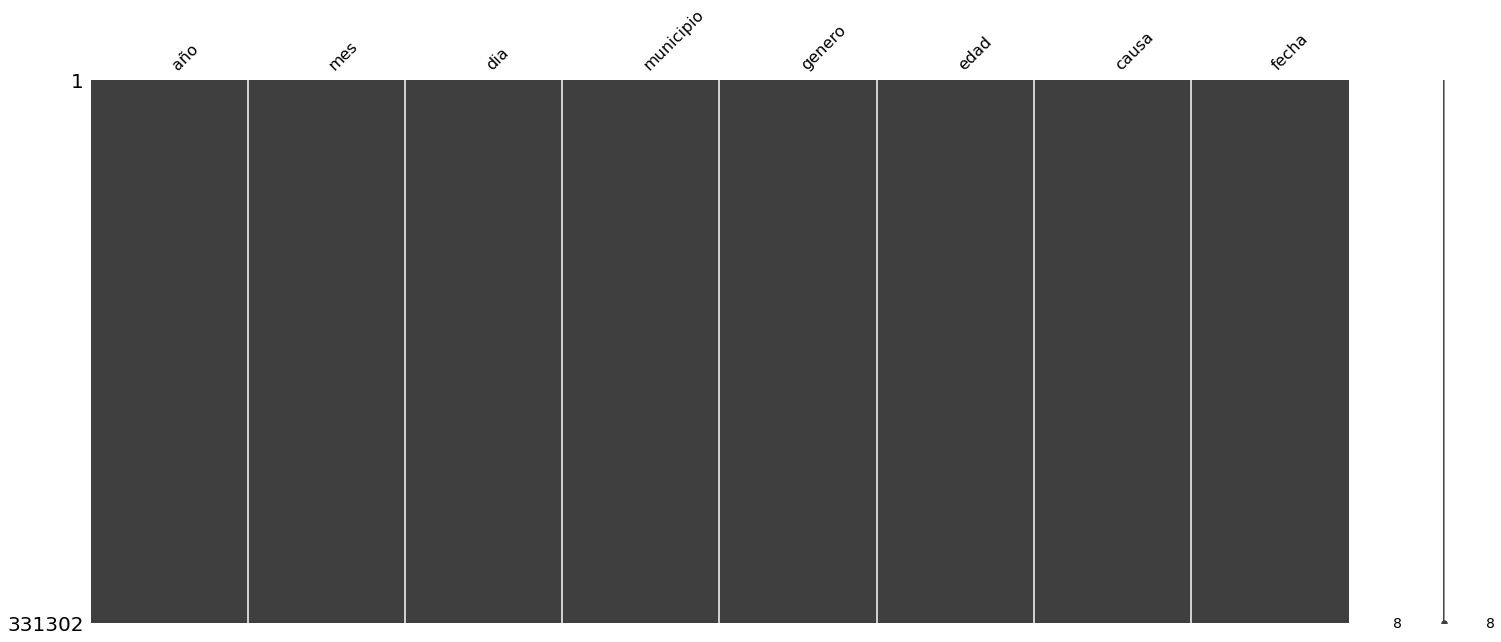

In [27]:
msno.matrix(df)

se agrupa por año

In [55]:
df.groupby(['año']).count()

,mes,dia,municipio,genero,edad,causa,fecha
año,,,,,,,
1998,10448,10448,10448,10448,10448,10448,10448
1999,10703,10703,10703,10703,10703,10703,10703
2000,10467,10467,10467,10467,10467,10467,10467
2001,10812,10812,10812,10812,10812,10812,10812
2002,10966,10966,10966,10966,10966,10966,10966
2003,11703,11703,11703,11703,11703,11703,11703
2004,11700,11700,11700,11700,11700,11700,11700
2005,12400,12400,12400,12400,12400,12400,12400
2006,12236,12236,12236,12236,12236,12236,12236


In [ ]:
#df.drop(df['año'].loc[(df.año > 2020)].index, inplace= True)

In [30]:
principales = df['causa'].value_counts()[df['causa'].value_counts() > 5000]
print(principales)

Enfermedades isquémicas del corazón                                                                              54740
Enfermedades endocrinas y metabólicas                                                                            39069
Otras enfermedades del aparato respiratorio                                                                      28929
Enfermedades de otras partes del aparato digestivo                                                               21531
Enfermedades cerebrovasculares                                                                                   15641
Tumores malignos de los órganos digestivos                                                                       13472
Agresiones                                                                                                       11776
Accidentes de transporte                                                                                         11696
Enfermedades víricas                            

## visualización de resultados

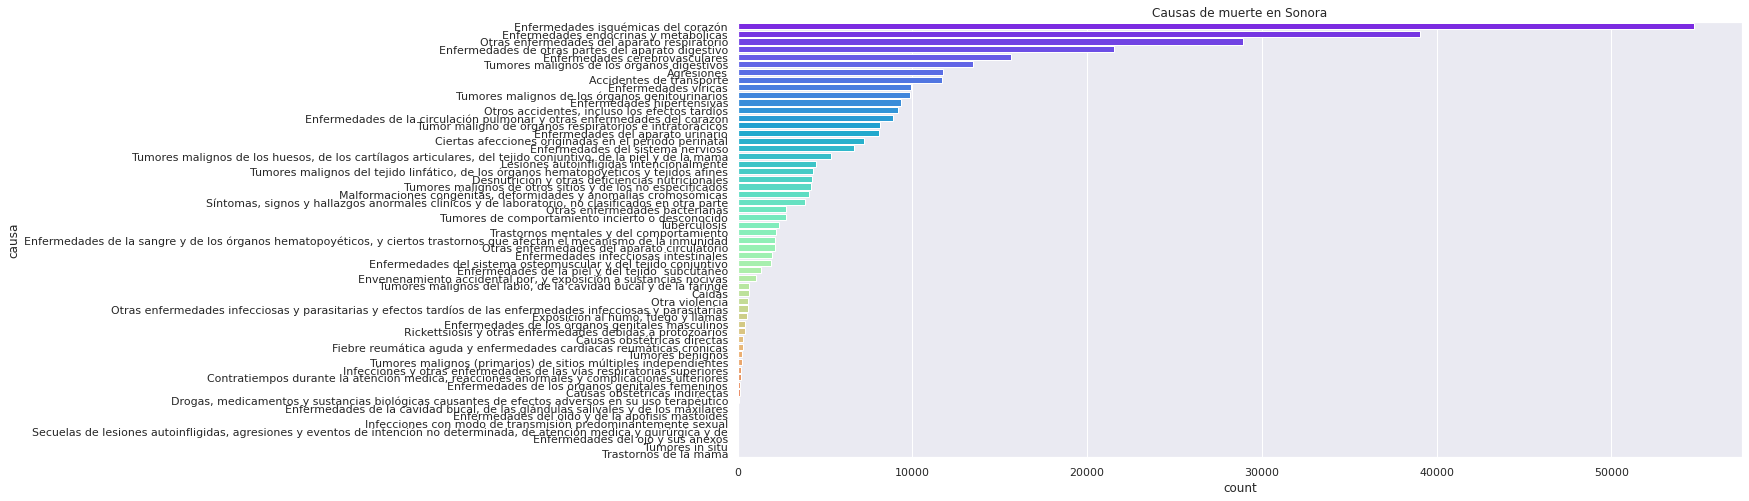

In [33]:
plt.figure(figsize=(18,8))
sns.countplot(y='causa',data=df, palette='rainbow', order = df['causa'].value_counts().index)
plt.title("Causas de muerte en Sonora")
plt.show()

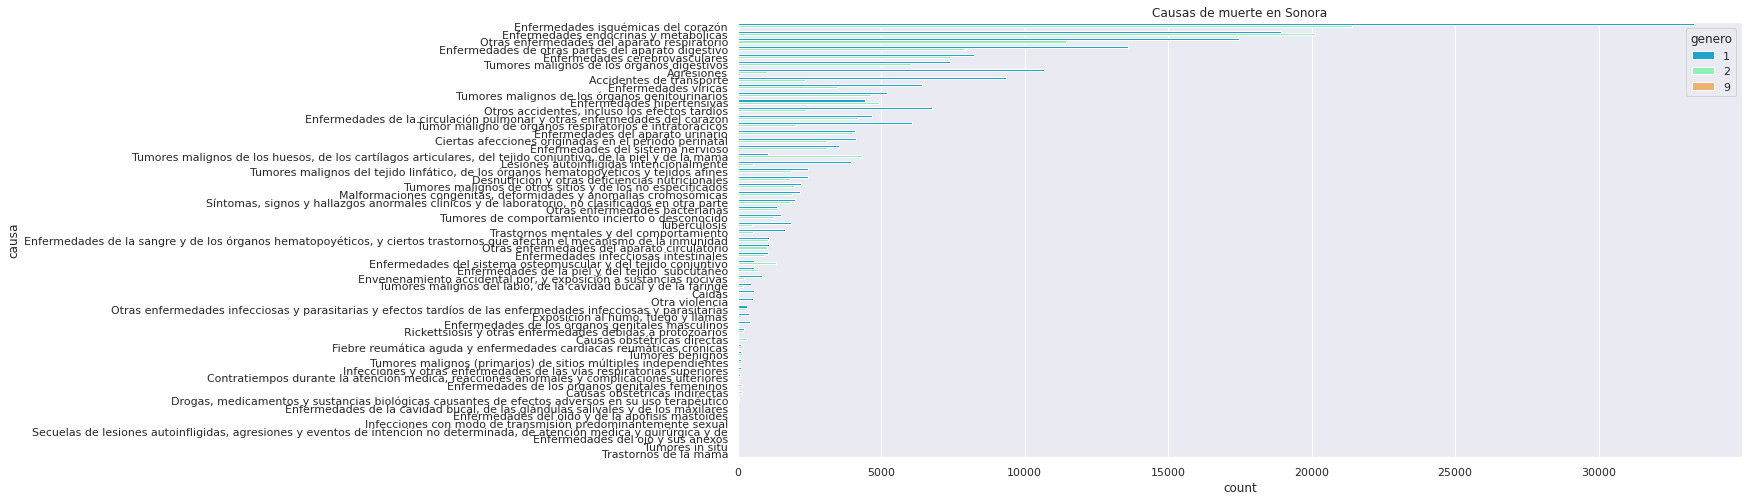

In [34]:
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
sns.countplot(y='causa',data=df, palette='rainbow', hue = 'genero', order = df['causa'].value_counts().index)
plt.title("Causas de muerte en Sonora")
plt.show()

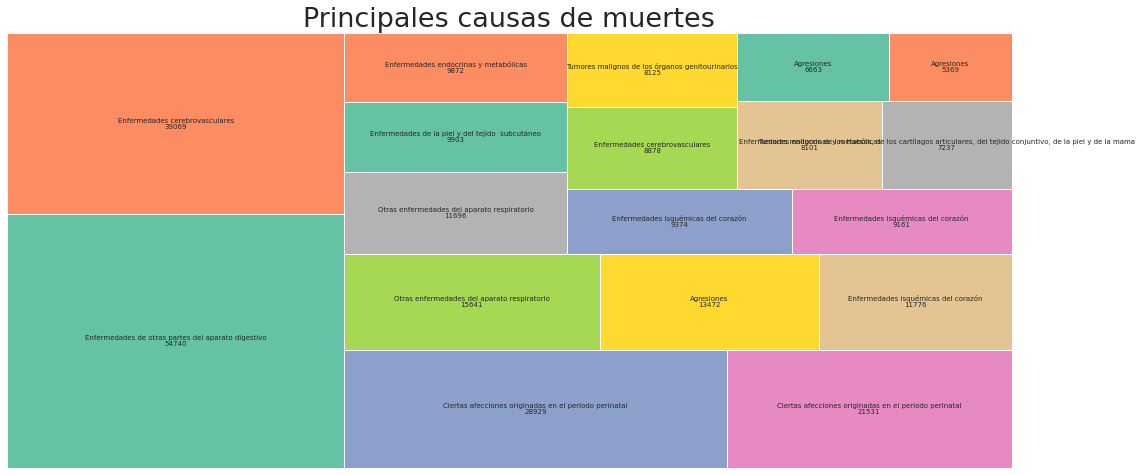

In [35]:
import squarify
import matplotlib
plt.figure(figsize=(18,8))
squarify.plot(sizes=principales, label= df.causa, value= principales,
              color=[matplotlib.cm.Set2(i) for i in range(8)],
              text_kwargs={'fontsize': 7}, pad = False)
plt.title('Principales causas de muertes', fontsize=27)
plt.axis('off')
plt.show()

se exporta el archivo para realizar un tablero con tableau

In [41]:
df.to_csv('archivos/datos_sonora_causas.csv', index = False)
# Se comprimen los resultados
with ZipFile('archivos/datos_sonora_causas.zip', 'w') as zip:
    zip.write('archivos/datos_sonora_causas.csv', compress_type = zipfile.ZIP_DEFLATED)
print('Se exportó el archivo')

Se exportó el archivo
